In [2]:
# Importing Libraries
import ast
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
ds = load_dataset('lukebarousse/data_jobs')
df = ds['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


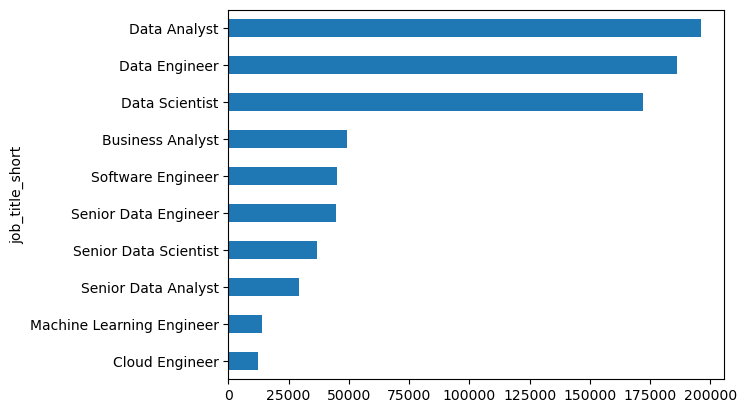

In [3]:
df['job_title_short'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()

<Axes: ylabel='count'>

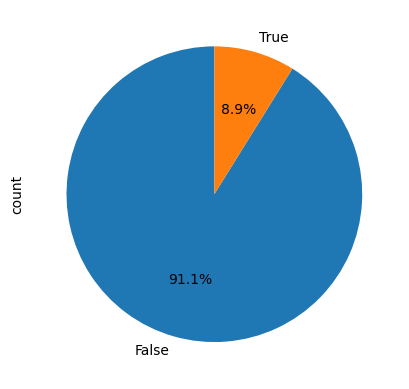

In [4]:
df['job_work_from_home'].value_counts().plot(kind= 'pie', startangle=90, autopct= '%1.1f%%' )

In [5]:
df[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


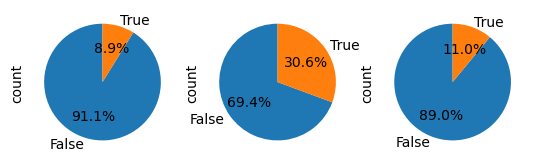

In [6]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'work from home',
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    # ax[i].pie(df[column].value_counts())
    # ax[i].set_title(title)
    df[column].value_counts().plot(kind= 'pie', ax=ax[i], startangle=90, autopct='%1.1f%%')



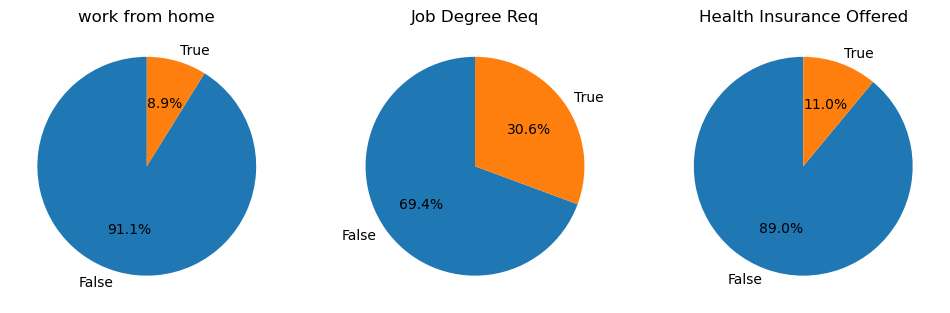

In [7]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(12, 5)

dict_column = {
    'job_work_from_home': 'work from home',
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(),startangle= 90, autopct= '%1.1f%%', labels= ['False', 'True'])
    ax[i].set_title(title)
    # df[column].value_counts().plot(kind= 'pie', ax=ax[i], startangle=90, autopct='%1.1f%%')